In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X=pd.read_excel('Sensor Data Train.xlsx',sheet_name="5 sensors' data for training")
y=pd.read_excel('Sensor Data Train.xlsx',sheet_name="Corres. Event Recorder's data")

In [3]:
X.shape

(62606, 6)

In [4]:
y.shape

(983, 2)

In [5]:
X.describe()

,S1,S2,S3,S4,S5
count,62606.000000,62606.000000,62606.000000,62606.000000,62606.000000
mean,2.726760,1.320443,7.209907,3.693253,1.555501
std,2.811193,4.589760,2.904749,1.922812,1.203263
min,-6.691788,-7.063904,-11.899628,0.990753,0.494817
25%,1.018738,-2.091141,5.793522,2.152790,0.610247
50%,1.717255,-1.032913,8.381653,2.952469,0.842117
75%,4.252121,6.205963,9.299835,5.565534,2.719744
max,18.909424,17.367737,20.614838,6.963261,3.992849


In [6]:
y.describe()

,Event_val
count,983.000000
mean,20.176444
std,16.212855
min,0.000000
25%,6.444000
50%,17.424001
75%,32.994000
max,60.120003


(array([241., 117., 153., 112.,  66.,  86.,  81.,  71.,  44.,  12.]),
 array([ 0.        ,  6.01200027, 12.02400055, 18.03600082, 24.0480011 ,
        30.06000137, 36.07200165, 42.08400192, 48.0960022 , 54.10800247,
        60.12000275]),
 <a list of 10 Patch objects>)

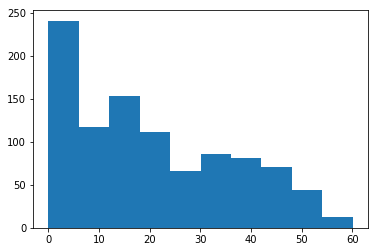

In [7]:
plt.hist(y.Event_val)

In [8]:
def closest_observation(t,t1,n):
    d=[]
    ind=[]
    for j,i in t.iteritems():
        if (i.hour==t1.hour) and (i.minute==t1.minute) and (i.second==t1.second):
            d.append(abs(i.microsecond-t1.microsecond))
            ind.append(j)
    a=np.array((d,ind)).T
    mins=[]
    for i in range(n):
        mins.append(a[a.argmin(axis=0)[0]][1])
        a=np.delete(a,a.argmin(axis=0),axis=0)
    return mins

In [9]:
X_n=[]
for i in range(len(y)):
    t=X.iloc[closest_observation(X.Time,y.Time[i],2),1:].values
    X_n.append(np.mean(t,axis=0))

In [10]:
X_n=np.array(X_n)

In [11]:
y_n=y.Event_val.values

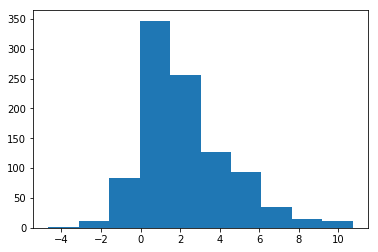

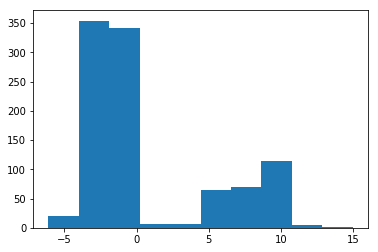

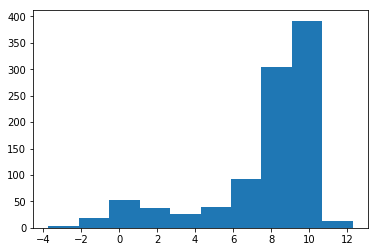

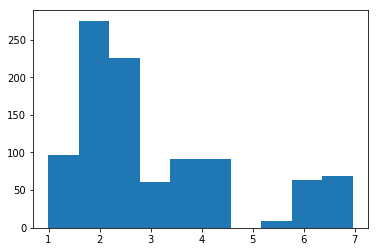

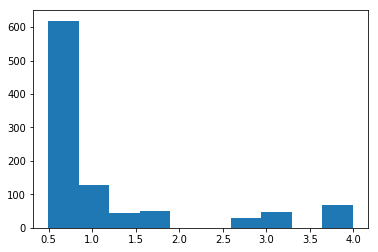

In [12]:
N,D=X_n.shape
for i in range(D):
    plt.hist(X_n[:,i])
    plt.show()

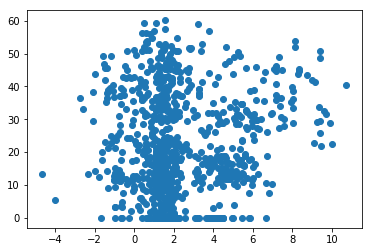

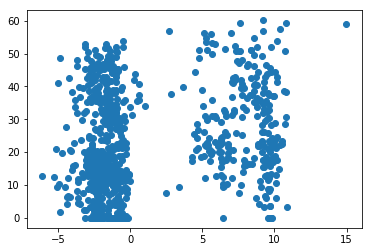

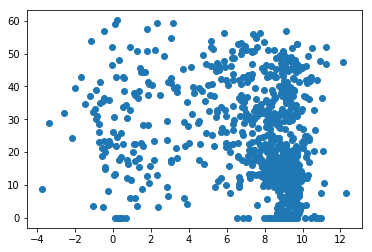

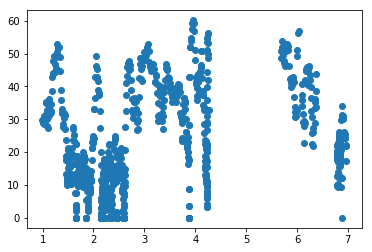

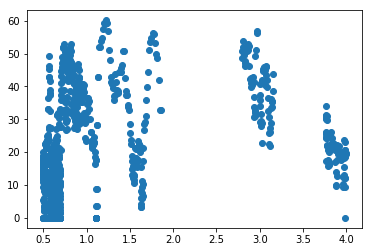

In [13]:
N,D=X_n.shape
for i in range(D):
    plt.scatter(X_n[:,i],y_n)
    plt.show()

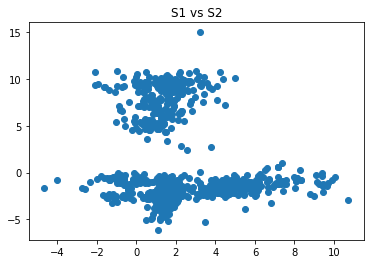

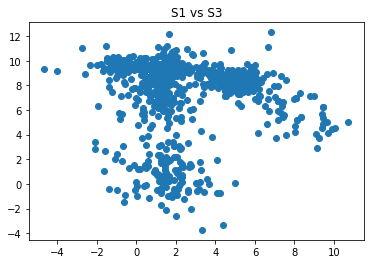

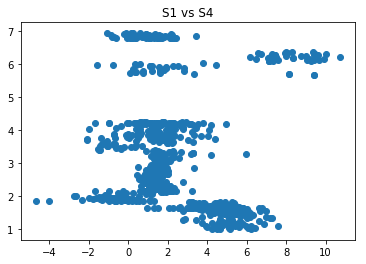

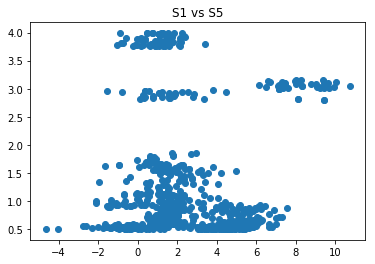

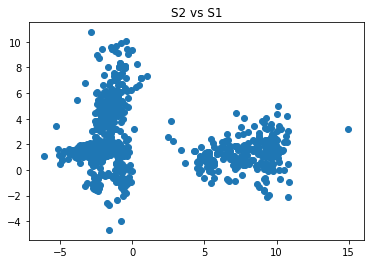

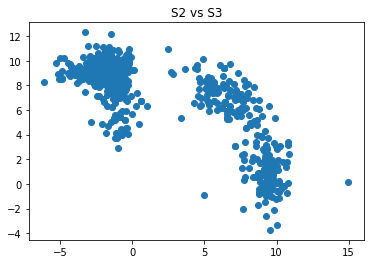

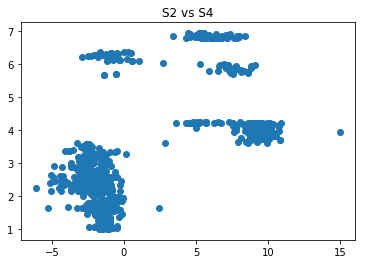

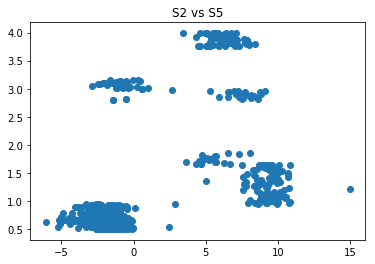

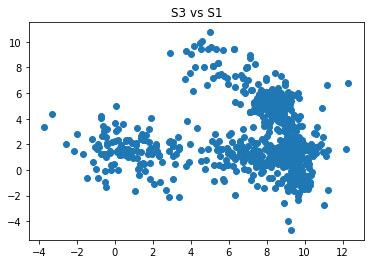

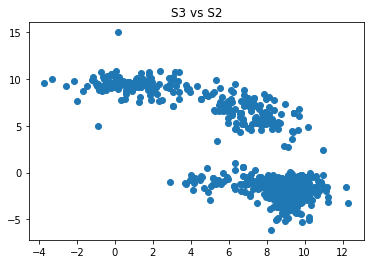

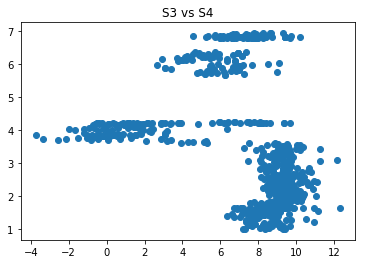

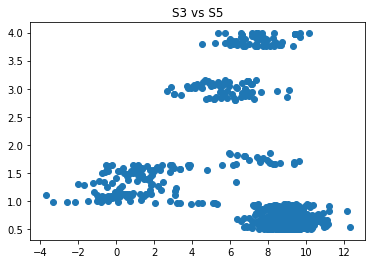

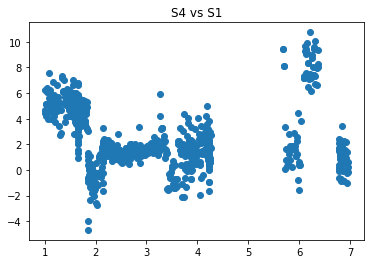

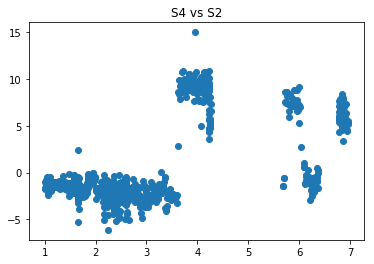

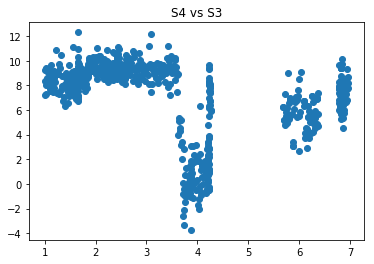

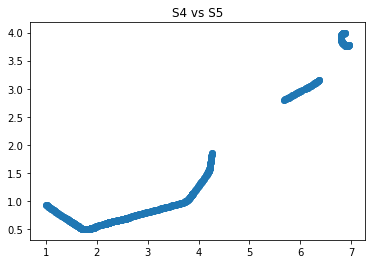

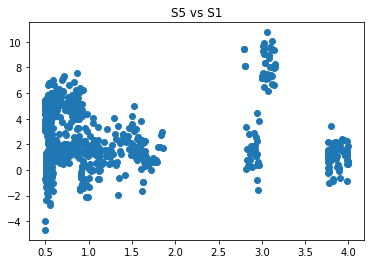

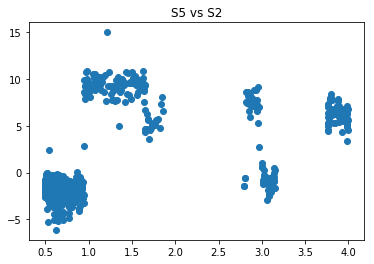

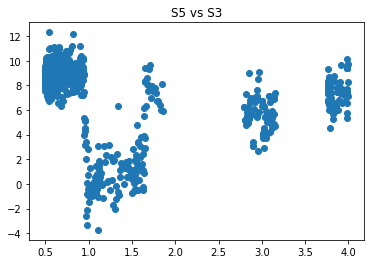

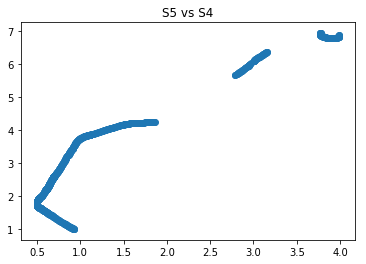

In [14]:
# Correlation between predictors
N,D=X_n.shape
for i in range(D):
    for j in range(D):
        if i!=j:
            plt.scatter(X_n[:,i],X_n[:,j])
            plt.title('S{0} vs S{1}'.format(i+1,j+1))
            plt.show()

In [15]:
# assuming the event recorder malfunctions when value is 0
X_n=X_n[y_n!=0]
y_n=y_n[y_n!=0]

In [16]:
# Feature Scaling
stds=[]
means=[]
for i in range(D):
    stds.append(X_n[:,i].std())
    means.append(X_n[:,i].mean())
    X_n[:,i]=(X_n[:,i]-means[i])/(stds[i])

In [17]:
def cost(y,y_p):
    return ((y-y_p)**2).mean()
def r2(y,y_p):
    RSS=((y-y_p)**2).sum()
    TSS=((y-y.mean())**2).sum()
    return (1-(RSS/TSS))

In [18]:
def train_linear(X,y,W,b,lr,epoch):
    N,D=X.shape
    tr_i=np.random.choice(N,int(N*0.8),replace=False)
    t_i=[i for i in range(N) if i not in tr_i]
    X_train=X[tr_i]
    y_train=y[tr_i]
    X_test=X[t_i]
    y_test=y[t_i]
    c_t=[]
    c_v=[]
    r2_t=[]
    r2_v=[]
    for i in range(epoch):
        y_p_train=X_train.dot(W)+b
        y_p_test=X_test.dot(W)+b
        W=W-lr*X_train.T.dot(y_p_train-y_train)
        b=b-lr*(y_p_train-y_train).sum(axis=0)
        c_t.append(cost(y_train,y_p_train))
        r2_t.append(r2(y_train,y_p_train))
        c_v.append(cost(y_test,y_p_test))
        r2_v.append(r2(y_test,y_p_test))
        if i % 100==0:
            print('Epoch: {0} Train Cost:{1} Train R2: {2} Test Cost: {3} Test R2: {4}'.format(i,c_t[i],r2_t[i],c_v[i],r2_v[i]))
    return W,b,c_t,c_v,r2_t,r2_v

In [19]:
W=np.random.randn(D)/np.sqrt(D)
b=np.random.randn()
W,b,c_t,c_v,r2_t,r2_v=train_linear(X_n,y_n,W,b,0.00001,100000)

Epoch: 0 Train Cost:877.7561736860862 Train R2: -3.321527525855016 Test Cost: 947.0526197320096 Test R2: -3.1055957989728604
Epoch: 100 Train Cost:366.4505610620887 Train R2: -0.8041755033684173 Test Cost: 437.5618893625493 Test R2: -0.8968874773461453
Epoch: 200 Train Cost:228.90682197377095 Train R2: -0.1269953566506321 Test Cost: 295.09471855915774 Test R2: -0.2792738350255446
Epoch: 300 Train Cost:190.6755095460582 Train R2: 0.061231936940595366 Test Cost: 253.381248426243 Test R2: -0.09844053794144347
Epoch: 400 Train Cost:179.83702913233088 Train R2: 0.1145938987820786 Test Cost: 240.690632204693 Test R2: -0.043425072528005204
Epoch: 500 Train Cost:176.6055259800534 Train R2: 0.13050381800692334 Test Cost: 236.5541932855803 Test R2: -0.025493073930268784
Epoch: 600 Train Cost:175.50108008927015 Train R2: 0.13594142523877428 Test Cost: 235.02562776789478 Test R2: -0.018866544382585948
Epoch: 700 Train Cost:175.00205108308023 Train R2: 0.13839833485798358 Test Cost: 234.33604717691

Epoch: 7000 Train Cost:169.6644073263496 Train R2: 0.16467758541688537 Test Cost: 229.14499639698258 Test R2: 0.006626754457088824
Epoch: 7100 Train Cost:169.64454850988966 Train R2: 0.16477535792425746 Test Cost: 229.12864287787147 Test R2: 0.006697649081064405
Epoch: 7200 Train Cost:169.62538946873173 Train R2: 0.16486968517163547 Test Cost: 229.11298803818846 Test R2: 0.0067655148392038456
Epoch: 7300 Train Cost:169.606905523033 Train R2: 0.16496068866727387 Test Cost: 229.09800564131038 Test R2: 0.006830465470667901
Epoch: 7400 Train Cost:169.58907286672158 Train R2: 0.1650484856175194 Test Cost: 229.08367036372235 Test R2: 0.006892610756173978
Epoch: 7500 Train Cost:169.5718685360379 Train R2: 0.16513318908169583 Test Cost: 229.06995776571978 Test R2: 0.006952056645007865
Epoch: 7600 Train Cost:169.55527037928996 Train R2: 0.1652149081210088 Test Cost: 229.0568442629433 Test R2: 0.007008905378422581
Epoch: 7700 Train Cost:169.53925702776323 Train R2: 0.16529374794176832 Test Cost:

Epoch: 13900 Train Cost:169.14818442699067 Train R2: 0.16721914711241637 Test Cost: 228.8224548855787 Test R2: 0.008025013694879513
Epoch: 14000 Train Cost:169.1465125375969 Train R2: 0.1672273784598588 Test Cost: 228.82261944034107 Test R2: 0.00802430032866619
Epoch: 14100 Train Cost:169.144899546456 Train R2: 0.16723531982879847 Test Cost: 228.82281652264516 Test R2: 0.008023445951345631
Epoch: 14200 Train Cost:169.1433433786673 Train R2: 0.16724298143476068 Test Cost: 228.8230443075899 Test R2: 0.008022458474100214
Epoch: 14300 Train Cost:169.14184203242587 Train R2: 0.16725037313339264 Test Cost: 228.82330104646135 Test R2: 0.00802134547783151
Epoch: 14400 Train Cost:169.14039357644754 Train R2: 0.1672575044331408 Test Cost: 228.82358506385145 Test R2: 0.00802011422565041
Epoch: 14500 Train Cost:169.13899614748448 Train R2: 0.16726438450748293 Test Cost: 228.8238947548791 Test R2: 0.008018771674924485
Epoch: 14600 Train Cost:169.13764794792843 Train R2: 0.16727102220672851 Test Cos

Epoch: 21200 Train Cost:169.10418783057645 Train R2: 0.1674357590920844 Test Cost: 228.8591981237804 Test R2: 0.00786572699711996
Epoch: 21300 Train Cost:169.10406587781313 Train R2: 0.1674363595119268 Test Cost: 228.85964325948802 Test R2: 0.007863797276159268
Epoch: 21400 Train Cost:169.10394822126972 Train R2: 0.16743693877984445 Test Cost: 228.86008307344713 Test R2: 0.007861890625667889
Epoch: 21500 Train Cost:169.10383470959658 Train R2: 0.16743749764098903 Test Cost: 228.86051756902435 Test R2: 0.007860007031050942
Epoch: 21600 Train Cost:169.103725196776 Train R2: 0.16743803681426161 Test Cost: 228.8609467527395 Test R2: 0.007858146464044147
Epoch: 21700 Train Cost:169.10361954193405 Train R2: 0.16743855699323762 Test Cost: 228.86137063409612 Test R2: 0.00785630888344857
Epoch: 21800 Train Cost:169.10351760915978 Train R2: 0.1674390588470589 Test Cost: 228.86178922541967 Test R2: 0.007854494235831733
Epoch: 21900 Train Cost:169.1034192673301 Train R2: 0.16743954302129382 Test C

Epoch: 28100 Train Cost:169.10101753472404 Train R2: 0.16745136766448976 Test Cost: 228.87904565473994 Test R2: 0.007779685379125767
Epoch: 28200 Train Cost:169.10100726691005 Train R2: 0.16745141821684373 Test Cost: 228.87920536898355 Test R2: 0.0077789929971884275
Epoch: 28300 Train Cost:169.10099736081636 Train R2: 0.16745146698831104 Test Cost: 228.87936246276675 Test R2: 0.007778311975286445
Epoch: 28400 Train Cost:169.10098780370004 Train R2: 0.16745151404163006 Test Cost: 228.87951697498067 Test R2: 0.007777642144821684
Epoch: 28500 Train Cost:169.10097858326714 Train R2: 0.16745155943732848 Test Cost: 228.87966894409567 Test R2: 0.007776983339020327
Epoch: 28600 Train Cost:169.1009696876568 Train R2: 0.16745160323380193 Test Cost: 228.87981840815948 Test R2: 0.0077763353929404255
Epoch: 28700 Train Cost:169.10096110542597 Train R2: 0.1674516454873889 Test Cost: 228.87996540479563 Test R2: 0.007775698143478893
Epoch: 28800 Train Cost:169.10095282553476 Train R2: 0.16745168625244

Epoch: 35200 Train Cost:169.10074891309452 Train R2: 0.16745269019095077 Test Cost: 228.88569590805565 Test R2: 0.00775085566944933
Epoch: 35300 Train Cost:169.10074810843304 Train R2: 0.16745269415260522 Test Cost: 228.88574313621427 Test R2: 0.007750650929263192
Epoch: 35400 Train Cost:169.10074733211863 Train R2: 0.16745269797469642 Test Cost: 228.88578954210962 Test R2: 0.007750449753694988
Epoch: 35500 Train Cost:169.10074658315264 Train R2: 0.16745270166214088 Test Cost: 228.8858351397532 Test R2: 0.007750252082002751
Epoch: 35600 Train Cost:169.10074586057164 Train R2: 0.16745270521968214 Test Cost: 228.88587994292874 Test R2: 0.007750057854432391
Epoch: 35700 Train Cost:169.1007451634461 Train R2: 0.1674527086518962 Test Cost: 228.8859239651955 Test R2: 0.007749867012202816
Epoch: 35800 Train Cost:169.10074449087932 Train R2: 0.16745271196319822 Test Cost: 228.88596721989146 Test R2: 0.007749679497492168
Epoch: 35900 Train Cost:169.10074384200612 Train R2: 0.167452715157848 Tes

Epoch: 43200 Train Cost:169.1007273681284 Train R2: 0.1674527962650143 Test Cost: 228.8877360224357 Test R2: 0.0077420115093113084
Epoch: 43300 Train Cost:169.100727322465 Train R2: 0.16745279648983258 Test Cost: 228.88774745072388 Test R2: 0.007741961966201472
Epoch: 43400 Train Cost:169.10072727841026 Train R2: 0.16745279670673086 Test Cost: 228.88775867687576 Test R2: 0.007741913299378678
Epoch: 43500 Train Cost:169.10072723590747 Train R2: 0.16745279691598824 Test Cost: 228.88776970444957 Test R2: 0.007741865493417488
Epoch: 43600 Train Cost:169.100727194902 Train R2: 0.16745279711787375 Test Cost: 228.88778053694153 Test R2: 0.007741818533161471
Epoch: 43700 Train Cost:169.10072715534108 Train R2: 0.16745279731264717 Test Cost: 228.8877911777869 Test R2: 0.007741772403718206
Epoch: 43800 Train Cost:169.10072711717385 Train R2: 0.16745279750055897 Test Cost: 228.88780163036103 Test R2: 0.007741727090455397
Epoch: 43900 Train Cost:169.10072708035122 Train R2: 0.16745279768185084 Tes

Epoch: 50000 Train Cost:169.10072618504282 Train R2: 0.16745280208979463 Test Cost: 228.88818986440518 Test R2: 0.007740044045577488
Epoch: 50100 Train Cost:169.1007261810578 Train R2: 0.16745280210941438 Test Cost: 228.88819325204133 Test R2: 0.007740029359735834
Epoch: 50200 Train Cost:169.10072617721318 Train R2: 0.16745280212834301 Test Cost: 228.8881965795563 Test R2: 0.007740014934527473
Epoch: 50300 Train Cost:169.10072617350397 Train R2: 0.16745280214660474 Test Cost: 228.8881998480157 Test R2: 0.007740000765332433
Epoch: 50400 Train Cost:169.10072616992545 Train R2: 0.1674528021642232 Test Cost: 228.88820305846605 Test R2: 0.007739986847614233
Epoch: 50500 Train Cost:169.10072616647298 Train R2: 0.16745280218122094 Test Cost: 228.88820621193565 Test R2: 0.007739973176915105
Epoch: 50600 Train Cost:169.10072616314218 Train R2: 0.16745280219761982 Test Cost: 228.88820930943444 Test R2: 0.00773995974885644
Epoch: 50700 Train Cost:169.10072615992868 Train R2: 0.16745280221344117 T

Epoch: 56200 Train Cost:169.1007260841658 Train R2: 0.16745280258645057 Test Cost: 228.88831783243407 Test R2: 0.007739489287593715
Epoch: 56300 Train Cost:169.10072608373451 Train R2: 0.16745280258857387 Test Cost: 228.88831894793822 Test R2: 0.007739484451738776
Epoch: 56400 Train Cost:169.10072608331848 Train R2: 0.16745280259062223 Test Cost: 228.88832004362644 Test R2: 0.007739479701788454
Epoch: 56500 Train Cost:169.10072608291708 Train R2: 0.16745280259259854 Test Cost: 228.8883211198508 Test R2: 0.007739475036216414
Epoch: 56600 Train Cost:169.10072608252977 Train R2: 0.16745280259450546 Test Cost: 228.88832217695673 Test R2: 0.007739470453525188
Epoch: 56700 Train Cost:169.10072608215614 Train R2: 0.16745280259634487 Test Cost: 228.88832321528383 Test R2: 0.00773946595224273
Epoch: 56800 Train Cost:169.10072608179567 Train R2: 0.16745280259811968 Test Cost: 228.88832423516547 Test R2: 0.007739461530923641
Epoch: 56900 Train Cost:169.10072608144793 Train R2: 0.16745280259983175

Epoch: 62700 Train Cost:169.10072607311358 Train R2: 0.16745280264086482 Test Cost: 228.8883610390924 Test R2: 0.007739301981132485
Epoch: 62800 Train Cost:169.10072607307166 Train R2: 0.16745280264107132 Test Cost: 228.88836138695362 Test R2: 0.007739300473109001
Epoch: 62900 Train Cost:169.1007260730312 Train R2: 0.16745280264127038 Test Cost: 228.88836172863344 Test R2: 0.007739298991882637
Epoch: 63000 Train Cost:169.1007260729922 Train R2: 0.16745280264146256 Test Cost: 228.88836206424176 Test R2: 0.007739297536976997
Epoch: 63100 Train Cost:169.10072607295456 Train R2: 0.16745280264164775 Test Cost: 228.88836239388635 Test R2: 0.007739296107925009
Epoch: 63200 Train Cost:169.10072607291823 Train R2: 0.16745280264182671 Test Cost: 228.88836271767326 Test R2: 0.00773929470426693
Epoch: 63300 Train Cost:169.10072607288322 Train R2: 0.16745280264199902 Test Cost: 228.88836303570648 Test R2: 0.007739293325551677
Epoch: 63400 Train Cost:169.10072607284943 Train R2: 0.16745280264216544 

Epoch: 70400 Train Cost:169.10072607199905 Train R2: 0.1674528026463522 Test Cost: 228.8883756927543 Test R2: 0.007739238455609643
Epoch: 70500 Train Cost:169.10072607199638 Train R2: 0.1674528026463652 Test Cost: 228.88837578021125 Test R2: 0.007739238076472366
Epoch: 70600 Train Cost:169.10072607199382 Train R2: 0.16745280264637785 Test Cost: 228.88837586611405 Test R2: 0.007739237704072588
Epoch: 70700 Train Cost:169.10072607199137 Train R2: 0.16745280264638984 Test Cost: 228.88837595049017 Test R2: 0.007739237338291294
Epoch: 70800 Train Cost:169.100726071989 Train R2: 0.1674528026464016 Test Cost: 228.8883760333668 Test R2: 0.007739236979010244
Epoch: 70900 Train Cost:169.10072607198668 Train R2: 0.16745280264641293 Test Cost: 228.88837611477058 Test R2: 0.007739236626114421
Epoch: 71000 Train Cost:169.1007260719845 Train R2: 0.16745280264642382 Test Cost: 228.8883761947276 Test R2: 0.007739236279490247
Epoch: 71100 Train Cost:169.10072607198236 Train R2: 0.16745280264643436 Test 

Epoch: 76800 Train Cost:169.10072607193143 Train R2: 0.16745280264668505 Test Cost: 228.88837905195908 Test R2: 0.007739223893021729
Epoch: 76900 Train Cost:169.10072607193115 Train R2: 0.16745280264668638 Test Cost: 228.88837907971703 Test R2: 0.007739223772687431
Epoch: 77000 Train Cost:169.1007260719309 Train R2: 0.1674528026466876 Test Cost: 228.88837910698166 Test R2: 0.007739223654491645
Epoch: 77100 Train Cost:169.10072607193064 Train R2: 0.16745280264668883 Test Cost: 228.8883791337618 Test R2: 0.007739223538396289
Epoch: 77200 Train Cost:169.1007260719304 Train R2: 0.16745280264669005 Test Cost: 228.88837916006594 Test R2: 0.007739223424364505
Epoch: 77300 Train Cost:169.10072607193018 Train R2: 0.16745280264669127 Test Cost: 228.88837918590266 Test R2: 0.007739223312358878
Epoch: 77400 Train Cost:169.10072607192996 Train R2: 0.16745280264669227 Test Cost: 228.88837921128018 Test R2: 0.007739223202344103
Epoch: 77500 Train Cost:169.10072607192973 Train R2: 0.16745280264669338 

Epoch: 83000 Train Cost:169.10072607192464 Train R2: 0.16745280264671847 Test Cost: 228.88838010002655 Test R2: 0.007739219349513493
Epoch: 83100 Train Cost:169.10072607192464 Train R2: 0.16745280264671847 Test Cost: 228.8883801091582 Test R2: 0.007739219309926604
Epoch: 83200 Train Cost:169.1007260719246 Train R2: 0.1674528026467187 Test Cost: 228.88838011812751 Test R2: 0.007739219271043485
Epoch: 83300 Train Cost:169.10072607192458 Train R2: 0.1674528026467188 Test Cost: 228.88838012693748 Test R2: 0.007739219232851147
Epoch: 83400 Train Cost:169.10072607192456 Train R2: 0.1674528026467189 Test Cost: 228.88838013559084 Test R2: 0.007739219195337599
Epoch: 83500 Train Cost:169.10072607192453 Train R2: 0.16745280264671902 Test Cost: 228.88838014409043 Test R2: 0.007739219158490851
Epoch: 83600 Train Cost:169.1007260719245 Train R2: 0.16745280264671913 Test Cost: 228.88838015243894 Test R2: 0.007739219122298913
Epoch: 83700 Train Cost:169.10072607192447 Train R2: 0.16745280264671936 Te

Epoch: 90300 Train Cost:169.10072607192393 Train R2: 0.16745280264672202 Test Cost: 228.88838047507147 Test R2: 0.007739217723645053
Epoch: 90400 Train Cost:169.10072607192393 Train R2: 0.16745280264672202 Test Cost: 228.8883804775377 Test R2: 0.0077392177129536055
Epoch: 90500 Train Cost:169.1007260719239 Train R2: 0.16745280264672213 Test Cost: 228.8883804799602 Test R2: 0.007739217702451895
Epoch: 90600 Train Cost:169.10072607192393 Train R2: 0.16745280264672202 Test Cost: 228.88838048233958 Test R2: 0.007739217692136924
Epoch: 90700 Train Cost:169.1007260719239 Train R2: 0.16745280264672213 Test Cost: 228.8883804846767 Test R2: 0.0077392176820052505
Epoch: 90800 Train Cost:169.10072607192393 Train R2: 0.16745280264672202 Test Cost: 228.88838048697224 Test R2: 0.007739217672053766
Epoch: 90900 Train Cost:169.1007260719239 Train R2: 0.16745280264672213 Test Cost: 228.88838048922702 Test R2: 0.00773921766227903
Epoch: 91000 Train Cost:169.10072607192393 Train R2: 0.16745280264672202 T

Epoch: 96800 Train Cost:169.10072607192387 Train R2: 0.16745280264672224 Test Cost: 228.88838057058226 Test R2: 0.007739217309593482
Epoch: 96900 Train Cost:169.10072607192384 Train R2: 0.16745280264672235 Test Cost: 228.88838057135112 Test R2: 0.007739217306260371
Epoch: 97000 Train Cost:169.10072607192384 Train R2: 0.16745280264672235 Test Cost: 228.88838057210629 Test R2: 0.007739217302986656
Epoch: 97100 Train Cost:169.10072607192387 Train R2: 0.16745280264672224 Test Cost: 228.88838057284806 Test R2: 0.007739217299770895
Epoch: 97200 Train Cost:169.10072607192384 Train R2: 0.16745280264672235 Test Cost: 228.88838057357657 Test R2: 0.007739217296612755
Epoch: 97300 Train Cost:169.10072607192387 Train R2: 0.16745280264672224 Test Cost: 228.88838057429217 Test R2: 0.007739217293510459
Epoch: 97400 Train Cost:169.10072607192387 Train R2: 0.16745280264672224 Test Cost: 228.88838057499507 Test R2: 0.0077392172904634515
Epoch: 97500 Train Cost:169.10072607192387 Train R2: 0.1674528026467

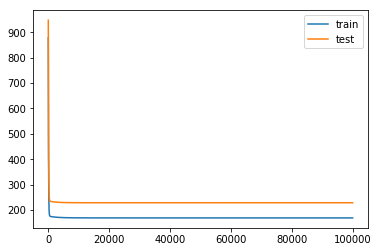

In [20]:
plt.plot(c_t,label='train')
plt.plot(c_v,label='test')
plt.legend()
plt.show()

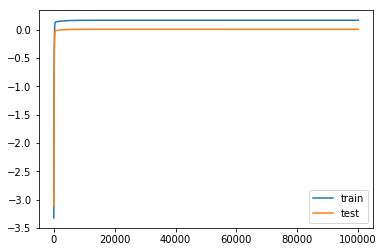

In [21]:
plt.plot(r2_t,label='train')
plt.plot(r2_v,label='test')
plt.legend()
plt.show()

In [22]:
import tensorflow as tf

C:\Users\ytnvj\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [23]:
def feed_forward(X,W1,b1,W2,b2,W3,b3,W4,b4):
#     z=tf.tanh(tf.matmul(X,W1)+b1)
    z=tf.nn.tanh(tf.matmul(X,W1)+b1)
    z=tf.nn.leaky_relu(tf.matmul(z,W2)+b2,alpha=0.3)
    z=tf.nn.relu(tf.matmul(z,W3)+b3)
    return (tf.tensordot(z,W4,axes=1)+b4)

In [24]:
def init_weights(shape,sd=0.01):
    return tf.Variable(tf.random_normal(shape,stddev=sd))
tfX=tf.placeholder(tf.float32,[None,D])
tfY=tf.placeholder(tf.float32,[None,])

In [25]:
M=11
K=5
J=20
W1=init_weights([D,M],np.sqrt(D))
b1=init_weights([M,])
W2=init_weights([M,K],np.sqrt(M))
b2=init_weights([K])
W3=init_weights([K,J],np.sqrt(K))
b3=init_weights([J,])
W4=init_weights([J,],np.sqrt(K))
b4=init_weights([1,])

In [26]:
y_p=feed_forward(tfX,W1,b1,W2,b2,W3,b3,W4,b4)
cost=tf.reduce_mean(tf.losses.mean_squared_error(labels=tfY,predictions=y_p))

In [27]:
RSS=tf.reduce_sum(((tfY-y_p)**2))
TSS=tf.reduce_sum((tfY-tf.reduce_mean(tfY))**2)
r2=1-(RSS/TSS)

In [28]:
N=X_n.shape[0]
tr_i=np.random.choice(N,int(0.9*N),replace=False)
t_i=[i for i in range(N) if i not in tr_i]

In [29]:
tr_i.shape

(720,)

In [30]:
len(t_i)

81

In [31]:
X_train=X_n[tr_i]
y_train=y_n[tr_i]
X_test=X_n[t_i]
y_test=y_n[t_i]

In [32]:
train=tf.train.GradientDescentOptimizer(0.00001).minimize(cost)

In [ ]:
trained_weights=[]
trained_biases=[]
with tf.Session() as s:
    s.run(tf.global_variables_initializer())
    c_t=[]
    r2s_t=[]    
    c_v=[]
    r2s_v=[]
    for i in range(20000):
        c_t.append(s.run(cost,feed_dict={tfX:X_train,tfY:y_train}))
        r2s_t.append(s.run(r2,feed_dict={tfX:X_train,tfY:y_train}))
        c_v.append(s.run(cost,feed_dict={tfX:X_test,tfY:y_test}))
        r2s_v.append(s.run(r2,feed_dict={tfX:X_test,tfY:y_test}))
        s.run(trainRMS,feed_dict={tfX:X_train,tfY:y_train})
        if i % 100==0:
            print('Epoch {0} Train Cost: {1} R2: {2} Test Cost: {3} R2: {4}'.format(i,c_t[i],r2s_t[i],c_v[i],r2s_v[i]))
    trained_weights.append({'W1':s.run(W1),'W2':s.run(W2),'W3':s.run(W3),'W4':s.run(W4)})
    trained_biases.append({'b1':s.run(b1),'b2':s.run(b2),'b3':s.run(b3),'b4':s.run(b4),})

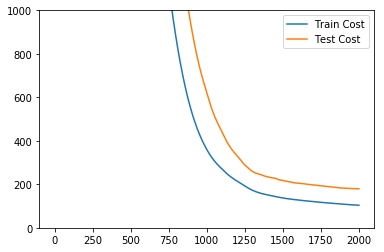

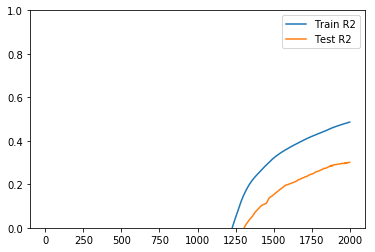

In [35]:
plt.plot(c_t,label='Train Cost')
plt.plot(c_v,label='Test Cost')
plt.legend()
plt.ylim([0,1000])
plt.show()

# leaky relu activation

# tanh
plt.plot(r2s_t,label='Train R2')
plt.plot(r2s_v,label='Test R2')
plt.legend()
plt.ylim([0,1])
plt.show()


In [37]:
trainRMS=tf.train.AdamOptimizer(learning_rate=0.001,beta1=0.9,beta2=0.99,epsilon=1e-9).minimize(cost)

In [44]:
trained_weights=[]
trained_biases=[]
with tf.Session() as s:
    s.run(tf.global_variables_initializer())
    c_t=[]
    r2s_t=[]    
    c_v=[]
    r2s_v=[]
    for i in range(10000):
        c_t.append(s.run(cost,feed_dict={tfX:X_train,tfY:y_train}))
        r2s_t.append(s.run(r2,feed_dict={tfX:X_train,tfY:y_train}))
        c_v.append(s.run(cost,feed_dict={tfX:X_test,tfY:y_test}))
        r2s_v.append(s.run(r2,feed_dict={tfX:X_test,tfY:y_test}))
        s.run(trainRMS,feed_dict={tfX:X_train,tfY:y_train})
        if i % 100==0:
            print('Epoch {0} Train Cost: {1} R2: {2} Test Cost: {3} R2: {4}'.format(i,c_t[i],r2s_t[i],c_v[i],r2s_v[i]))
    trained_weights.append({'W1':s.run(W1),'W2':s.run(W2),'W3est Cost: 139.54469299316406 R2: 0.45631033182144165
Epoch 4100 Train Cost: 51.17496871948242 R2: 0.746545672416687 Te':s.run(W3),'W4':s.run(W4)})
    trained_biases.append({'b1':s.run(b1),'b2':s.run(b2),'b3':s.run(b3),'b4':s.run(b4),})

Epoch 0 Train Cost: 300498.125 R2: -1487.277587890625 Test Cost: 320128.4375 R2: -1246.2744140625
Epoch 100 Train Cost: 152493.359375 R2: -754.254150390625 Test Cost: 149416.03125 R2: -581.1500854492188
Epoch 200 Train Cost: 73397.5546875 R2: -362.5162048339844 Test Cost: 60669.2578125 R2: -235.37767028808594
Epoch 300 Train Cost: 39795.54296875 R2: -196.095458984375 Test Cost: 31377.078125 R2: -121.25039672851562
Epoch 400 Train Cost: 22788.16015625 R2: -111.86295318603516 Test Cost: 19001.259765625 R2: -73.03211212158203
Epoch 500 Train Cost: 13223.861328125 R2: -64.49383544921875 Test Cost: 11515.080078125 R2: -43.86469650268555
Epoch 600 Train Cost: 7571.271484375 R2: -36.49824905395508 Test Cost: 7077.27783203125 R2: -26.574268341064453
Epoch 700 Train Cost: 4208.17333984375 R2: -19.841825485229492 Test Cost: 4220.22705078125 R2: -15.442716598510742
Epoch 800 Train Cost: 2244.78955078125 R2: -10.117773056030273 Test Cost: 2653.536865234375 R2: -9.338626861572266
Epoch 900 Train Co

Epoch 7100 Train Cost: 39.76082229614258 R2: 0.8030765056610107 Test Cost: 99.96712493896484 R2: 0.6105111837387085
Epoch 7200 Train Cost: 39.63409423828125 R2: 0.8037041425704956 Test Cost: 100.86565399169922 R2: 0.6070104241371155
Epoch 7300 Train Cost: 39.51092529296875 R2: 0.8043141961097717 Test Cost: 101.53211975097656 R2: 0.6044137477874756
Epoch 7400 Train Cost: 39.40357208251953 R2: 0.8048458695411682 Test Cost: 101.41168975830078 R2: 0.6048829555511475
Epoch 7500 Train Cost: 39.30182647705078 R2: 0.8053497672080994 Test Cost: 102.38107299804688 R2: 0.6011060476303101
Epoch 7600 Train Cost: 39.204410552978516 R2: 0.8058322668075562 Test Cost: 102.65123748779297 R2: 0.6000534296035767
Epoch 7700 Train Cost: 39.1010627746582 R2: 0.8063440918922424 Test Cost: 103.0164566040039 R2: 0.5986305475234985
Epoch 7800 Train Cost: 38.99549865722656 R2: 0.8068669438362122 Test Cost: 103.58377075195312 R2: 0.596420168876648
Epoch 7900 Train Cost: 38.89731979370117 R2: 0.8073531985282898 Tes

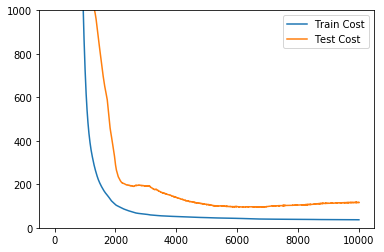

In [45]:
plt.plot(c_t,label='Train Cost')
plt.plot(c_v,label='Test Cost')
plt.legend()
plt.ylim([0,1000])
plt.show()

# tanh activation

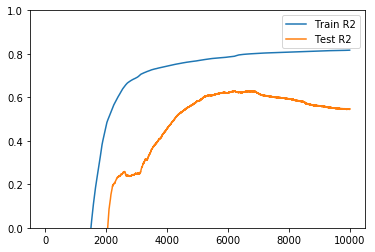

In [46]:
# tanh
plt.plot(r2s_t,label='Train R2')
plt.plot(r2s_v,label='Test R2')
plt.legend()
plt.ylim([0,1])
plt.show()


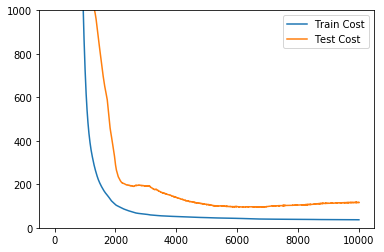

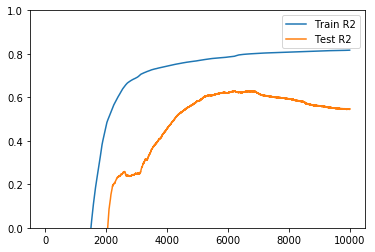

In [47]:
plt.plot(c_t,label='Train Cost')
plt.plot(c_v,label='Test Cost')
plt.legend()
plt.ylim([0,1000])
plt.show()

# leaky relu activation

# tanh
plt.plot(r2s_t,label='Train R2')
plt.plot(r2s_v,label='Test R2')
plt.legend()
plt.ylim([0,1])
plt.show()


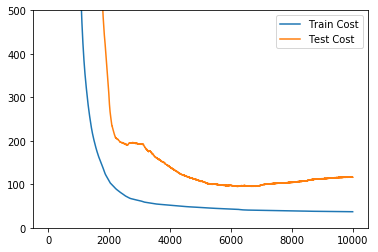

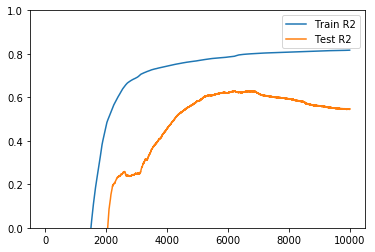

In [48]:
plt.plot(c_t,label='Train Cost')
plt.plot(c_v,label='Test Cost')
plt.legend()
plt.ylim([0,500])
plt.show()

# leaky relu activation

# tanh
plt.plot(r2s_t,label='Train R2')
plt.plot(r2s_v,label='Test R2')
plt.legend()
plt.ylim([0,1])
plt.show()


In [49]:
trained_weights[0]['W1']

array([[ 1.7107743 , -0.24336244, -3.1387389 , -0.1387614 ,  0.84959996,
         0.5885956 , -0.80059123, -0.49400598, -0.8499209 ,  2.2628217 ,
        -4.588353  ],
       [-0.0906659 , -0.6714535 ,  0.6177655 ,  0.7779222 ,  5.925206  ,
        -2.4445589 ,  0.5077417 ,  1.8626282 ,  3.2073667 ,  3.5096629 ,
        -3.1972103 ],
       [ 0.47042903, -3.159956  ,  0.2827458 ,  0.42571798, -2.4666867 ,
        -1.4438106 ,  3.3759766 ,  0.52088094,  1.9357002 ,  2.2467687 ,
        -2.0654898 ],
       [-3.2118075 , -0.66873336,  1.0408725 , -1.0314801 ,  3.8062146 ,
         2.2047534 , -2.2814434 , -0.9100838 , -3.2253423 ,  0.05666251,
         2.124518  ],
       [ 4.133217  , -2.8556056 ,  2.8197203 ,  1.2471261 , -7.148273  ,
         1.4267342 , -0.27832702, -5.983225  , -0.94500726, -0.1869988 ,
        -0.5919093 ]], dtype=float32)

In [ ]:
np.savez('OAWeights',W1=trained_weights[0]['W1'],W2=trained_weights[0]['W2'],W3=trained_weights[0]['W3'],W4=trained_weights[0]['W4'])

In [ ]:
np.savez('OABiases',b1=trained_biases[0]['b1'],b2=trained_biases[0]['b2'],b3=trained_biases[0]['b3'],b4=trained_biases[0]['b4'],)

In [ ]:
W1_f=tf.Variable(trained_weights[0]['W1'])
b1_f=tf.Variable(trained_biases[0]['b1'])
W2_f=tf.Variable(trained_weights[0]['W2'])
b2_f=tf.Variable(trained_biases[0]['b2'])
W3_f=tf.Variable(trained_weights[0]['W3'])
b3_f=tf.Variable(trained_biases[0]['b3'])
W4_f=tf.Variable(trained_weights[0]['W4'])
b4_f=tf.Variable(trained_biases[0]['b4'])
y_f=feed_forward(tfX,W1_f,b1_f,W2_f,b2_f,W3_f,b3_f,W4_f,b4_f)

In [ ]:
with tf.Session() as s:
    s.run(tf.global_variables_initializer())
    x=s.run(y_f,feed_dict={tfX:X_val})

In [ ]:
plt.plot(x)

In [53]:
df_val=pd.read_excel('Sensor Data Test.xlsx',sheet_name="5 sensors data for test set")
y_val=pd.read_excel('Sensor Data Test.xlsx',sheet_name="Event recorder's value -predict")

In [54]:
X_val=df_val.iloc[:,1:].values

In [242]:
X_val.shape

(2023, 5)

In [342]:
from sklearn.neighbors import KNeighborsRegressor

In [354]:
knn=KNeighborsRegressor(7)

In [355]:
knn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=7, p=2,
          weights='uniform')

In [356]:
RSS=((-y_test)**2).sum()

In [357]:
knn.score(X_test,y_test)

0.5572480298617924

In [362]:
s=[]
for i in [1,3,5,7,9,11,13,15,17]:
    knn=KNeighborsRegressor(i)
    knn.fit(X_train,y_train)
    RSS=((-y_test)**2).sum()
    s.append(knn.score(X_test,y_test))

In [363]:
s

[0.4744366461909597,
 0.6560852733581781,
 0.5960511751743318,
 0.5572480298617924,
 0.5607258220057374,
 0.5375767734686094,
 0.5186117177981959,
 0.5099161297452115,
 0.49356692197094554]

(array([1.000e+00, 2.100e+01, 1.800e+01, 3.500e+01, 1.096e+03, 1.240e+02,
        1.960e+02, 2.030e+02, 3.040e+02, 2.500e+01]),
 array([25.25294116, 26.35242352, 27.45190589, 28.55138825, 29.65087061,
        30.75035297, 31.84983533, 32.94931769, 34.04880005, 35.14828241,
        36.24776477]),
 <a list of 10 Patch objects>)

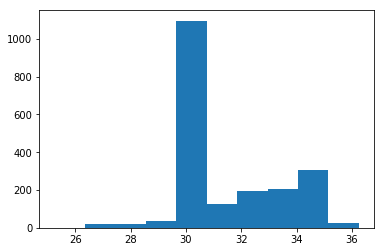

In [365]:
plt.hist(knn.predict(X_val))

In [366]:
from sklearn.ensemble import AdaBoostRegressor

In [376]:
adb=AdaBoostRegressor(learning_rate=1,n_estimators=5000)

In [377]:
adb.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1, loss='linear',
         n_estimators=5000, random_state=None)

In [378]:
adb.score(X_test,y_test)

0.7350242359764647

In [379]:
from sklearn.ensemble import GradientBoostingRegressor

In [380]:
gdb=GradientBoostingRegressor()

In [381]:
gdb.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [382]:
gdb.score(X_test,y_test)

0.8414971007725275

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.530e+02, 2.600e+01,
        2.000e+00, 3.000e+00, 1.540e+02, 1.584e+03]),
 array([34.85474786, 36.25107002, 37.64739217, 39.04371432, 40.44003647,
        41.83635863, 43.23268078, 44.62900293, 46.02532509, 47.42164724,
        48.81796939]),
 <a list of 10 Patch objects>)

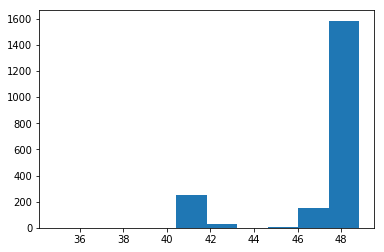

In [384]:
plt.hist(gdb.predict(X_val))

In [385]:
from sklearn.neural_network import MLPRegressor

In [423]:
nn=MLPRegressor(hidden_layer_sizes=(100,200,500,5000),max_iter=20000,activation='relu')

In [424]:
nn.fit(X_train,y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 200, 500, 5000), learning_rate='constant',
       learning_rate_init=0.001, max_iter=20000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [425]:
nn.score(X_test,y_test)

0.5328988464267476

In [64]:
from sklearn.ensemble import RandomForestRegressor

In [71]:
rf=RandomForestRegressor(100,random_state=100)

In [74]:
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=100, verbose=0, warm_start=False)

In [75]:
rf.score(X_test,y_test)

0.8470406937837917

In [438]:
rf.estimators_

[DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=186422792, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=735107864, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1195587395, splitter='best'),
 DecisionTreeRegresso

(array([ 27., 362., 319., 590., 346., 164., 123.,  62.,  26.,   4.]),
 array([29.0952002 , 29.3603402 , 29.6254802 , 29.8906202 , 30.15576019,
        30.42090019, 30.68604019, 30.95118019, 31.21632019, 31.48146019,
        31.74660019]),
 <a list of 10 Patch objects>)

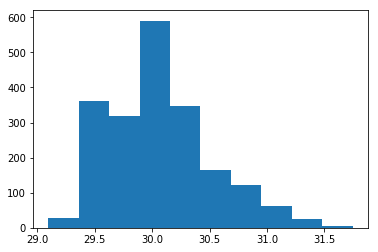

In [76]:
plt.hist(rf.predict(X_val))

In [56]:
stds

[2.3791292206466723,
 4.7109614222885146,
 3.104848064829228,
 1.7059496646981582,
 1.0454278957020635]

In [58]:
D

5

In [59]:
for i in range(D):
    X_val[:,i]=(X_val[:,i]-means[i])/stds[i]

In [60]:
X_val

array([[ 0.87905394, -0.40943083,  0.12123079, -1.33310087, -0.32083401],
       [ 1.07830533, -0.43890894,  0.3664449 , -1.33317697, -0.32077114],
       [ 0.92282678, -0.53445287,  0.09308543, -1.33329112, -0.32067685],
       ...,
       [ 1.53065671, -0.25950415, -0.12745295, -1.39153426, -0.27557978],
       [ 1.53317084, -0.24476347, -0.05843857, -1.39152204, -0.27555984],
       [ 1.57543648, -0.20690284,  0.04566046, -1.39151971, -0.27555604]])

In [78]:
W1_f=tf.Variable(trained_weights[0]['W1'])
b1_f=tf.Variable(trained_biases[0]['b1'])
W2_f=tf.Variable(trained_weights[0]['W2'])
b2_f=tf.Variable(trained_biases[0]['b2'])
W3_f=tf.Variable(trained_weights[0]['W3'])
b3_f=tf.Variable(trained_biases[0]['b3'])
W4_f=tf.Variable(trained_weights[0]['W4'])
b4_f=tf.Variable(trained_biases[0]['b4'])
y_f=feed_forward(tfX,W1_f,b1_f,W2_f,b2_f,W3_f,b3_f,W4_f,b4_f)

with tf.Session() as s:
    s.run(tf.global_variables_initializer())
    x=s.run(y_f,feed_dict={tfX:X_val})

(array([2.000e+00, 1.000e+00, 1.100e+01, 1.717e+03, 7.400e+01, 4.800e+01,
        4.600e+01, 7.200e+01, 4.500e+01, 7.000e+00]),
 array([-0.22401065,  7.62960532, 15.48322129, 23.33683726, 31.19045323,
        39.0440692 , 46.89768517, 54.75130114, 62.60491711, 70.45853308,
        78.31214905]),
 <a list of 10 Patch objects>)

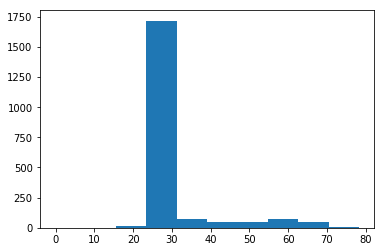

In [79]:
plt.hist(x)

In [81]:
df_val['pred']=rf.predict(X_val)

In [82]:
df_val.head()

,Time,S1,S2,S3,S4,S5,pred
0,00:38:31.703000,4.382599,-0.785110,7.696915,0.990644,0.934168,29.668680
1,00:38:31.723000,4.856644,-0.923981,8.458267,0.990514,0.934234,30.315240
2,00:38:31.753000,4.486740,-1.374084,7.609528,0.990319,0.934332,29.965680
3,00:38:31.777000,5.060165,-1.381271,7.668182,0.990163,0.934411,29.605680
4,00:38:31.782000,4.839890,-1.570404,7.841766,0.990131,0.934428,30.020761


In [83]:
def closest_observation(t,t1,n):
    d=[]
    ind=[]
    for j,i in t.iteritems():
        if (i.hour==t1.hour) and (i.minute==t1.minute) and (i.second==t1.second):
            d.append(abs(i.microsecond-t1.microsecond))
            ind.append(j)
    a=np.array((d,ind)).T
    mins=[]
    for i in range(n):
        mins.append(a[a.argmin(axis=0)[0]][1])
        a=np.delete(a,a.argmin(axis=0),axis=0)
    return mins

X_n=[]
for i in range(len(y_val)):
    t=df_val.iloc[closest_observation(df_val.Time,y_val.Time[i],2),1:].values
    X_n.append(np.mean(t,axis=0))

In [86]:
np.array(X_n)[:,-1]

array([29.99195982, 30.09258039, 29.98583986, 30.21066032, 29.62457954,
       29.87190007, 30.71988067, 29.85281989, 30.80916053, 30.09312011,
       30.3346806 , 30.36600016, 29.66166026, 30.29832066, 30.18888098,
       30.02615996, 29.63285954, 30.03174006, 31.05102071, 30.64176023,
       30.06684   , 30.12875999, 30.02184004, 30.01338005, 30.09132012,
       30.18888013, 29.94191986, 29.86037984, 29.75489975, 30.26844018,
       30.26430016, 29.84381976, 30.19320103, 29.86505997, 29.49335975,
       29.48813974, 29.40695975, 29.54519975, 29.6105398 , 29.54519975])

In [92]:
df_f=pd.DataFrame(y_val.iloc[:,0],columns=['Time'])

In [96]:
df_f['Event_val']=np.array(X_n)[:,-1]

In [98]:
df_f.to_excel('Final Output.xlsx')

In [41]:
trained_weights=[]
trained_biases=[]